In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_test=pd.read_csv('/content/test_2umaH9m.csv')
data_test.head()


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [3]:
#Exploratory Data Analysis
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [4]:
data_test.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


In [5]:
data_test.shape

(23490, 13)

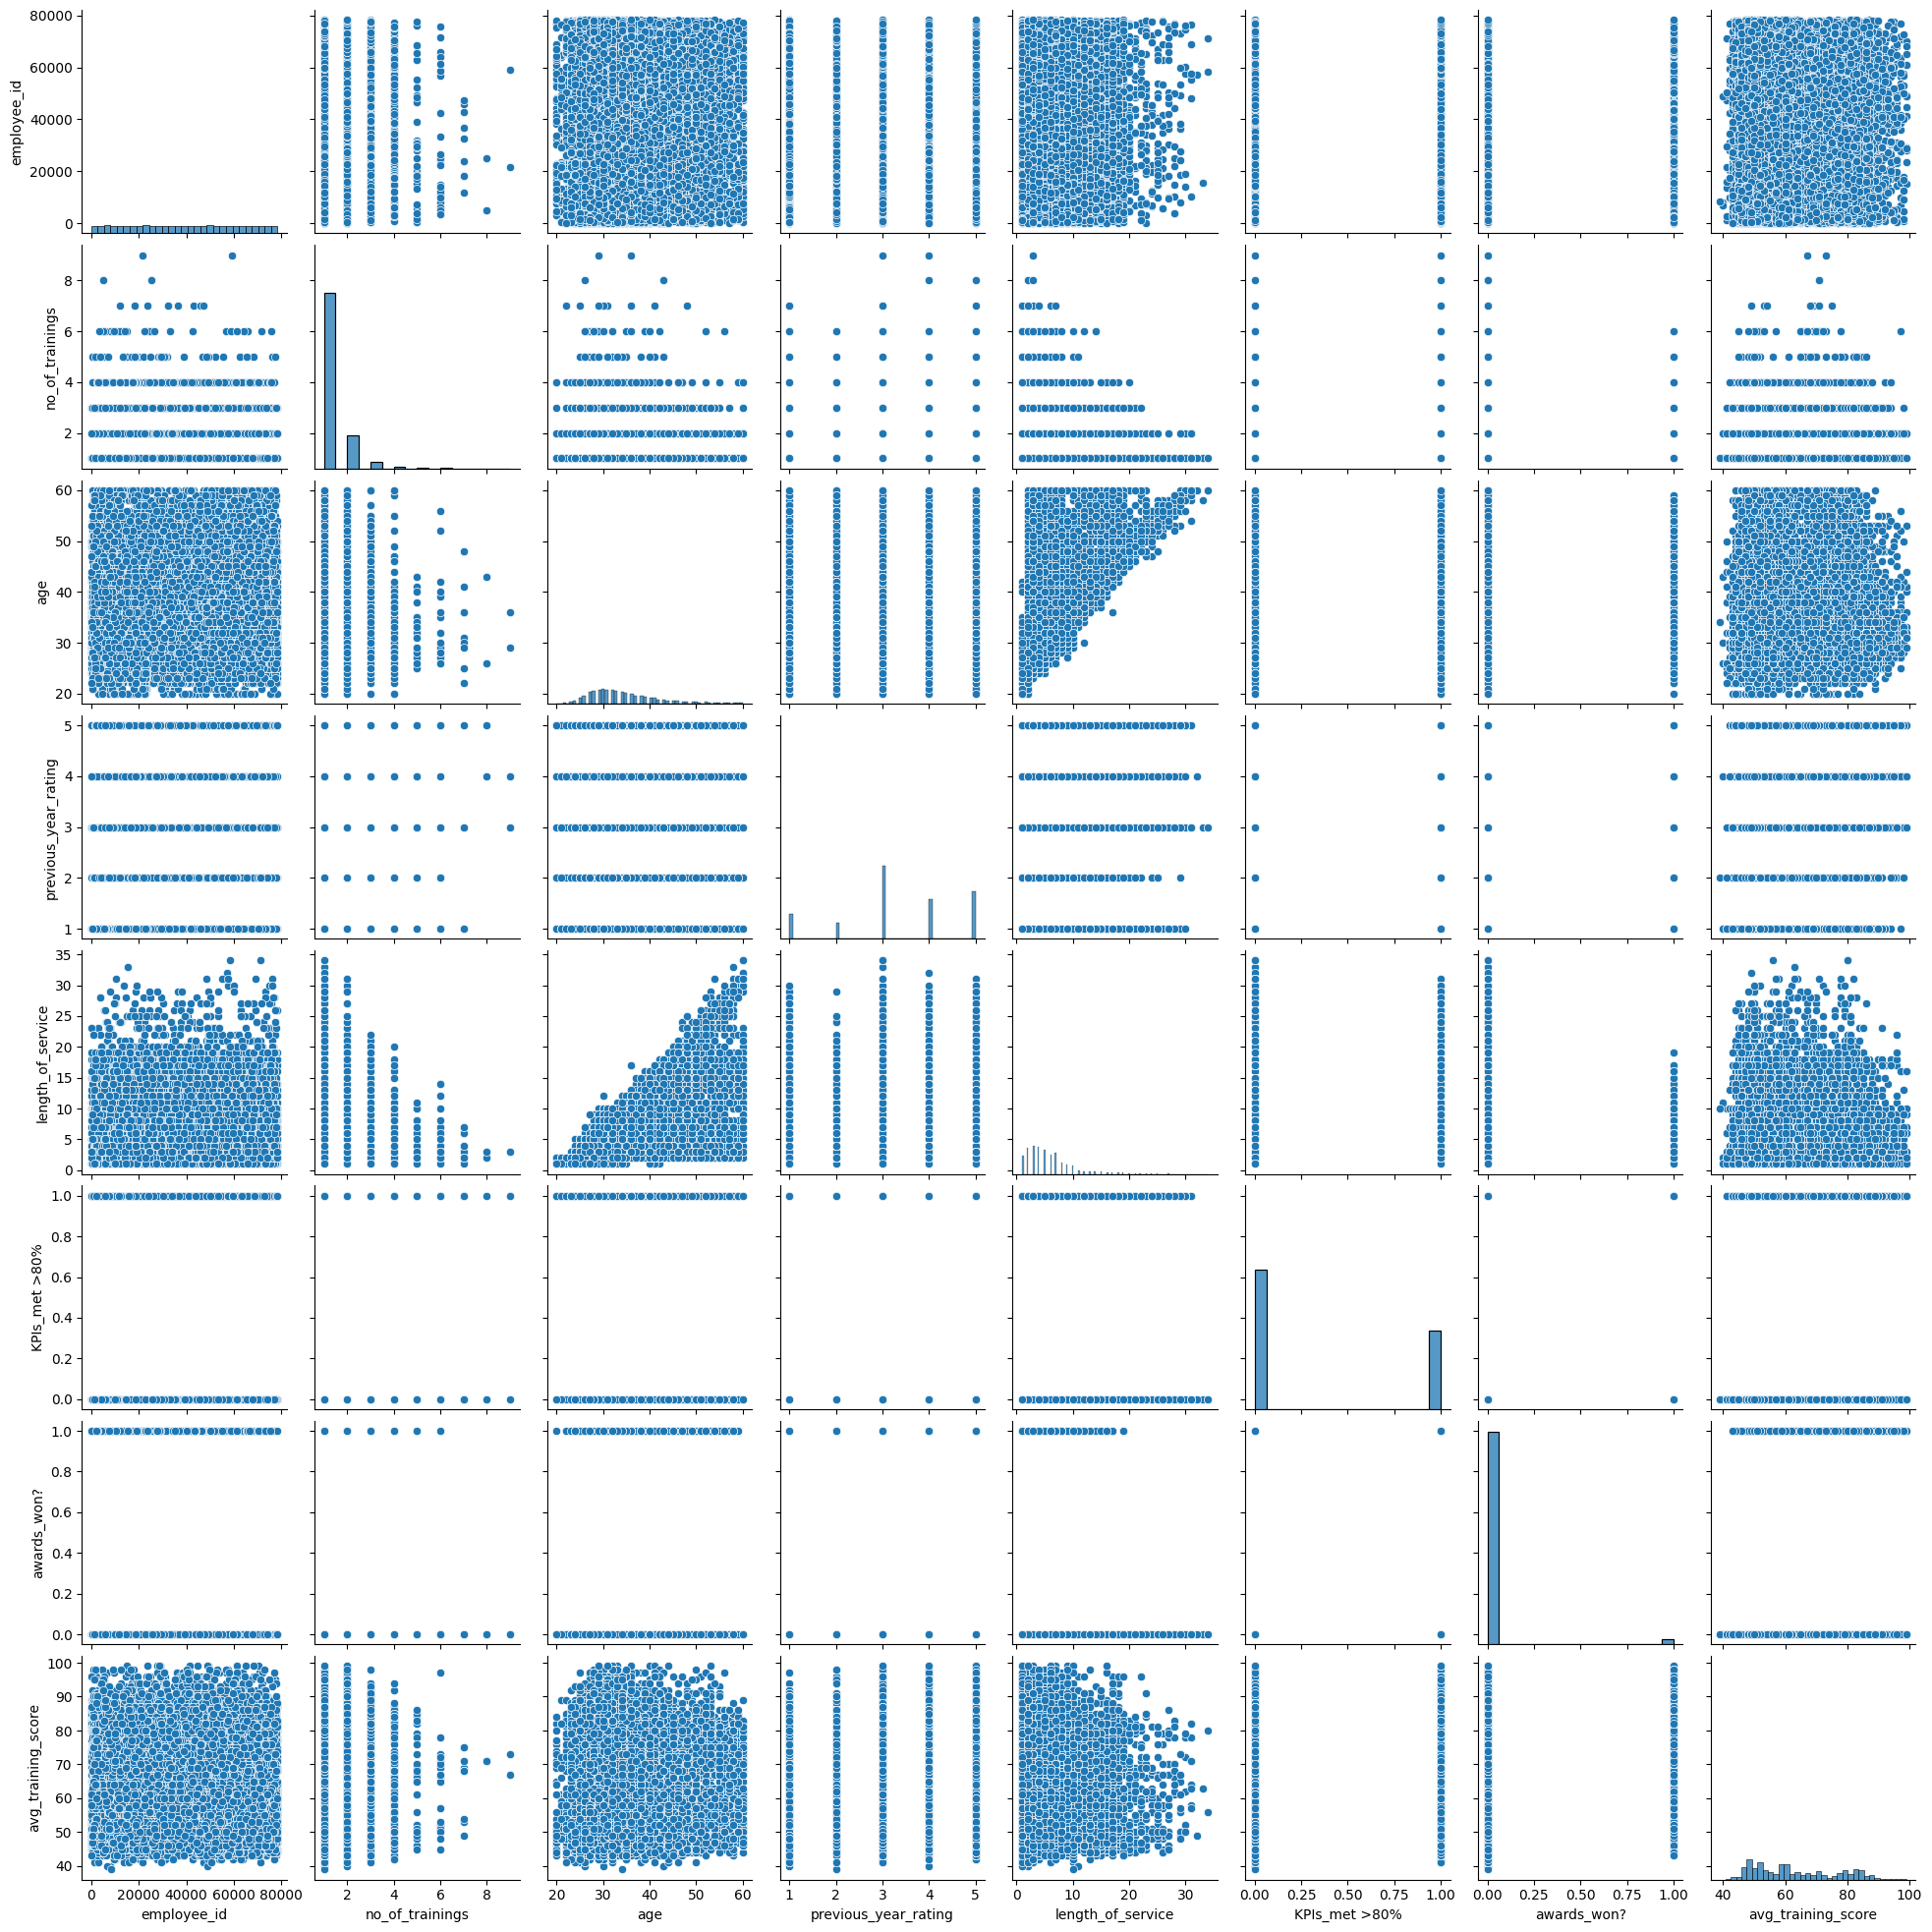

In [6]:
sns.pairplot(data_test)

In [7]:
#preprocessing
data_test.duplicated().sum()

0

In [8]:
data_test.isna().sum()

,0
employee_id,0
department,0
region,0
education,1034
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,1812
length_of_service,0


In [9]:
data_test.education=data_test.education.fillna(data_test.education.mode()[0])

In [10]:
data_test.previous_year_rating=data_test.previous_year_rating.fillna(data_test.previous_year_rating.median())

In [11]:
data_test.isna().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


In [12]:
data_train=pd.read_csv('/content/train_LZdllcl.csv')

In [13]:
data_train.duplicated().sum()

0

In [14]:
data_train.isna().sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


In [15]:
data_train.education=data_train.education.fillna(data_train.education.mode()[0])
data_train.previous_year_rating=data_train.previous_year_rating.fillna(data_train.previous_year_rating.median())

In [16]:
data_train.isna().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


In [18]:
#modelling
x_train=data_train.drop('is_promoted',axis=1)
y_train=data_train.is_promoted
x_test=data_test.drop('is_promoted',axis=1)
y_test=data_test.is_promoted
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score

KeyError: "['is_promoted'] not found in axis"

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
data_sample=pd.read_csv('/content/sample_submission_M0L0uXE.csv')

In [ ]:
#replace the target column with predicted values
data_sample['target']=y_pred

In [ ]:
#save this new dataset as a csv file

data_sample.to_csv('data_sample.csv')

In [ ]:
pip install tensorflow keras-tuner

In [ ]:
X = data.iloc[:,0:8]
y = data.iloc[:,8]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state = 42,stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import keras_tuner as kt

In [ ]:
#Create a function to build the ANN model
def build_model(hp):
  model = Sequential()

  model.add(Dense(hp.Int('units',min_value=16,max_value=128,step=16),activation='relu'))

  for i in range(hp.Int('num_layers',1,3)):
    model.add(Dense(hp.Int(f'units_{i}',min_value=16,max_value=128,step=16),activation='relu'))

  model.add(Dense(1,activation='sigmoid'))

  model.compile(
      optimizer = tf.keras.optimizers.get({
          'class_name': hp.Choice('optimizer',values=['adam','rmsprop','sgd']),
          'config' : {'learning_rate':hp.Float('learning_rate',min_value=1e-4,max_value=1e-2,sampling= 'log')}
      }),
      loss = 'binary_crossentropy',
      metrics = ['accuracy']
    )
  return model

In [ ]:
tuner = kt.RandomSearch(
    build_model,
    objective = 'val_accuracy',
    max_trials = 5
)

In [ ]:
tuner.search(
    X_train,y_train,
    epochs =20,
    validation_split = 0.2,
    verbose = 1
)

In [ ]:
best_hps = tuner.get_best_hyperparameters(1)[0]
print('Units in 1st layer',best_hps.get('units'))
print('No of layers',best_hps.get('num_layers'))
for i in range(best_hps.get('num_layers')):
  print(f"units in layer {i+1}:{best_hps.get(f'units_{i}')}")
print('optimizer :',best_hps.get('optimizer'))
print('Learning rate :',best_hps.get('learning_rate'))

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

In [ ]:
# Define a function to build the ANN model with dropout and regularization tuning
def build_model(hp):
    model = Sequential()

    # First hidden layer with L2 regularization and dropout
    model.add(Dense(
        units=hp.Int('units', min_value=32, max_value=128, step=32),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_regularizer', min_value=1e-5, max_value=1e-2, sampling='log')),
    ))
    model.add(Dropout(hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    directory='keras_tuner',
    project_name='tune_dropout_regularization'
)

In [ ]:
tuner.search(
    X_train, y_train,
    epochs=20,
    validation_split=0.2,
    verbose=1
)

In [ ]:
best_hps = tuner.get_best_hyperparameters(1)[0]
print('Units in 1st layer',best_hps.get('units'))
print('L2 Regularizer :',best_hps.get('l2_regularizer'))
print("Dropout rate :", best_hps.get('dropout_rate'))